In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch transformers summac

INFO: pip is looking at multiple versions of summac to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of summac to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/

In [ ]:
!pip install summac

In [ ]:
!pip install nltk

In [ ]:
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.17.0
    Uninstalling huggingface-hub-0.17.0:
      Successfully uninstalled huggingface-hub-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
summac 0.0.4 requires huggingface-hub<=0.17.0, but you have huggingface-hub 0.24.6 which is incompatible.


In [ ]:
from summac.model_summac import SummaCZS
import torch
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Dataset/Extracted Dataset (csv)/test_plos.csv')

## Pegasus

In [ ]:
peg_df=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Dataset/test_peg_v4.csv')

In [ ]:
peg_df = peg_df.drop(columns=["abstract"])
peg_df["abstract"] = test_df["abstract"]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#SummaCZA model
model = SummaCZS(granularity="sentence", model_name="vitc")

Using device: cuda


In [ ]:
#Function to score the summaries
def score_factual_consistency(row):
    source_text = [row['abstract']]
    summary_text = [row['generated_summary']]
    result = model.score(source_text, summary_text)
    score = result['scores'][0]
    return score

In [ ]:
peg_df['factual_consistency_score'] = peg_df.apply(score_factual_consistency, axis=1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/217 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/235M [00:00<?, ?B/s]

In [ ]:
#Scaling the summaries from a range of [-1,1] to [1,10]
def score_to_1_to_10(score):
    return ((score + 1) / 2) * 9 + 1

In [ ]:
peg_df['factual_consistency_scaled'] = peg_df['factual_consistency_score'].apply(score_to_1_to_10)

In [ ]:
peg_summaczs=peg_df['factual_consistency_scaled'].mean()

In [ ]:
print(peg_df['factual_consistency_scaled'].mean())

6.238762287592126


In [ ]:
peg_df.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/SUMMAC Baseline/test_peg_v4.csv', index=False)

## BART

In [ ]:
bart_df=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Dataset/test_bart_v2.csv')

In [ ]:
bart_df = bart_df.drop(columns=["abstract"])
bart_df["abstract"] = test_df["abstract"]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#SummaCZS model
model = SummaCZS(granularity="sentence", model_name="vitc")

Using device: cuda


In [ ]:
#Function to score summaries
def score_factual_consistency(row):
    source_text = [row['abstract']]
    summary_text = [row['generated_summary']]
    result = model.score(source_text, summary_text)
    score = result['scores'][0]
    return score

In [ ]:
#Scaling the summaries from a range of [-1,1] to [1,10]
def score_to_1_to_10(score):
    return ((score + 1) / 2) * 9 + 1

In [ ]:
bart_df['factual_consistency_score'] = bart_df.apply(score_factual_consistency, axis=1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
bart_df['factual_consistency_scaled'] = bart_df['factual_consistency_score'].apply(score_to_1_to_10)

In [ ]:
bart_summaczs=bart_df['factual_consistency_scaled'].mean()

In [ ]:
print(bart_df['factual_consistency_scaled'].mean())

7.082369855430172


In [ ]:
bart_df.to_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/SUMMAC Baseline/test_bart_v2.csv', index=False)

### Graph creation

In [ ]:
gpt_df=pd.read_csv('/content/drive/MyDrive/DISSERTATION/Results/Factual Consistency/Extracted/avg_scores.csv')

In [ ]:
gpt_df

,Model,Average Score
0,Pegasus,7.166
1,BART,8.317


In [ ]:
data = {
    'Model': ['Pegasus', 'BART'],
    'GPT': [gpt_df['Average Score'][0], gpt_df['Average Score'][1]],
    'SUMMACZS': [round(peg_summaczs,3), round(bart_summaczs,3)]
}

df = pd.DataFrame(data)

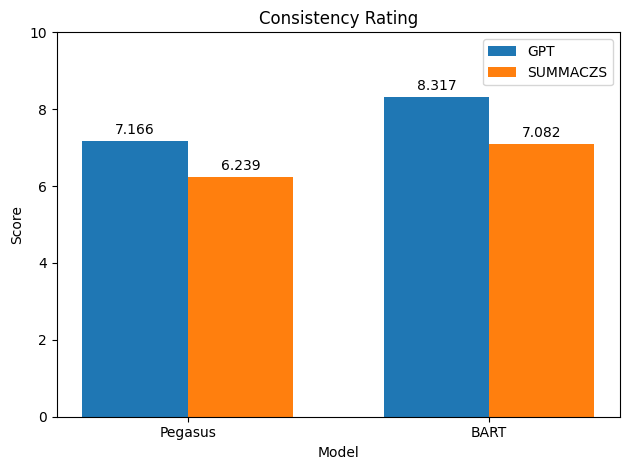

In [ ]:
#Graph for Consistency Rating
labels = df['Model']
gpt_scores = df['GPT']
summaczs_scores = df['SUMMACZS']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gpt_scores, width, label='GPT')
rects2 = ax.bar(x + width/2, summaczs_scores, width, label='SUMMACZS')


ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Consistency Rating')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.ylim(0, 10)
fig.tight_layout()

#Saving the graph
plt.savefig('consistency_rating.png')

plt.show()